# Fraudulent Transactions Prediction

In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading dataset into a dataframe
df = pd.read_csv(r'C:\Users\deepa\Desktop\INFO 6105\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#exploring the dimensions of the dataframe
df.shape

(6362620, 11)

In [4]:
#Exploring statistical data of the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
#Exploring the sum of unique values among each feature
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [6]:
# Checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Checking duplicates
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


### Splitting Numerical and Categorical columns¶


In [8]:
# Categorical columns
cat_col = [i for i in df.drop('isFraud', axis=1).columns if df[i].dtypes == 'O']
cat_col

['type', 'nameOrig', 'nameDest']

In [9]:
# Numeric columns
num_col = [i for i in df.drop('isFraud', axis=1).columns if df[i].dtypes != 'O']
num_col

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud']

In [10]:
# dropping columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

### Remove Outliers

Checking outliers through Boxplot

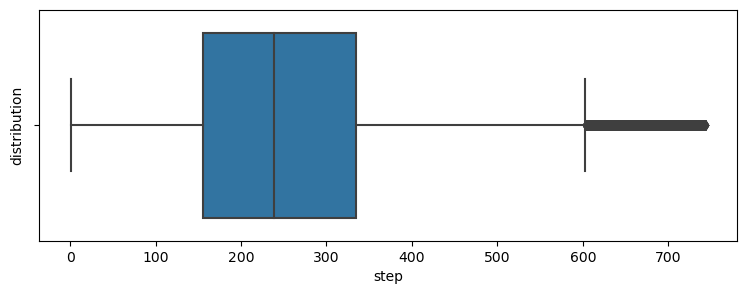

In [11]:
# step
plt.figure(figsize=[9,3])
sns.boxplot(x='step', data=df)
plt.ylabel('distribution')
plt.show()

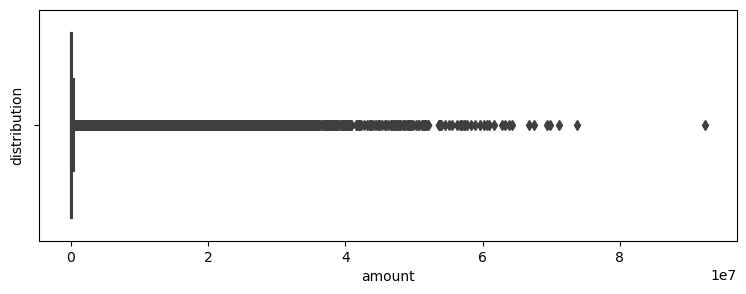

In [12]:
# Amount
plt.figure(figsize=[9,3])
sns.boxplot(x='amount', data=df)
plt.ylabel('distribution')
plt.show()

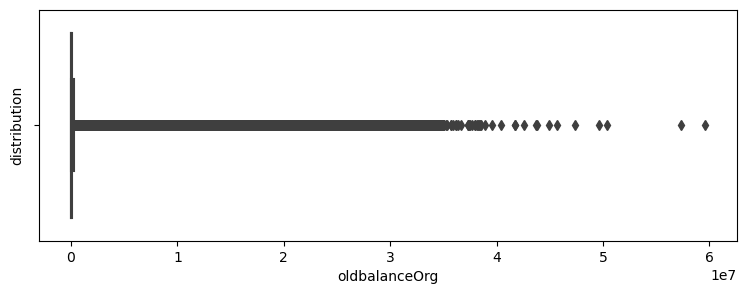

In [13]:
# oldbalanceOrg
plt.figure(figsize=[9,3])
sns.boxplot(x='oldbalanceOrg', data=df)
plt.ylabel('distribution')
plt.show()

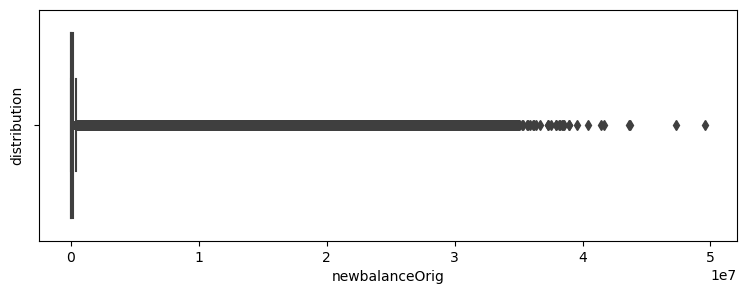

In [14]:
# newbalanceOrig
plt.figure(figsize=[9,3])
sns.boxplot(x='newbalanceOrig', data=df)
plt.ylabel('distribution')
plt.show()

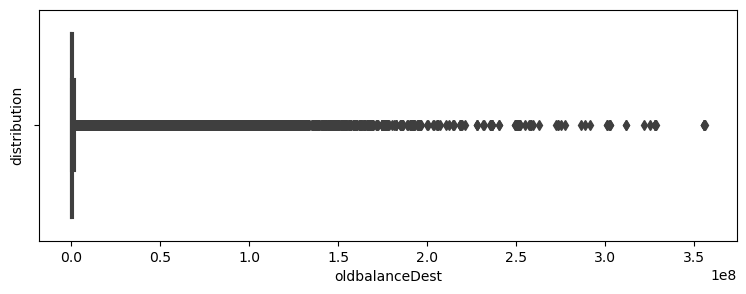

In [15]:
# oldbalanceDest
plt.figure(figsize=[9,3])
sns.boxplot(x='oldbalanceDest', data=df)
plt.ylabel('distribution')
plt.show()

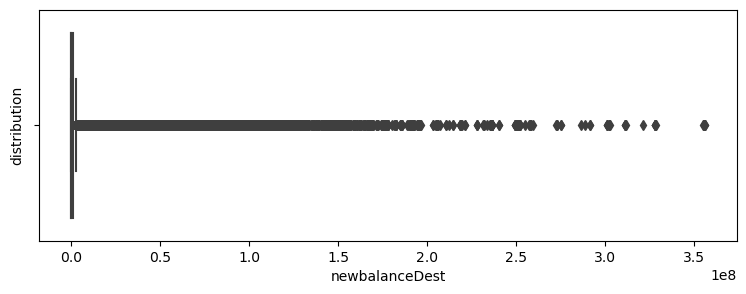

In [16]:
# newbalanceDest
plt.figure(figsize=[9,3])
sns.boxplot(x='newbalanceDest', data=df)
plt.ylabel('distribution')
plt.show()

### Removing outliers 

In [17]:
# creating function to remove outliers
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [18]:
# calling the function to remove outliers
df['amount'] = remove_outliers(df, 'amount')
df['oldbalanceOrg'] = remove_outliers(df, 'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df, 'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df, 'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df, 'newbalanceDest')
#The outliers have been removed.

# EDA

Correlation of numeric data

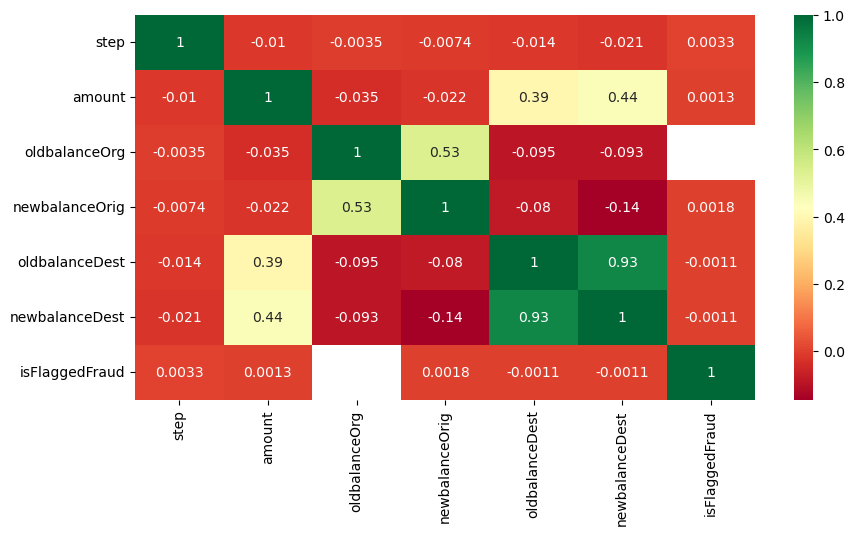

In [19]:
# checking for multicollinearity
plt.figure(figsize=[10,5])
sns.heatmap(df[num_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

This plot shows that the <b>old and new transactions</b> of both <b>sender's</b> and <b>reciepient's</b> are <b>highly correlated</b> with each other.

### Univariate Analysis

Target variable = <b>isFraud</b>

0    6354407
1       8213
Name: isFraud, dtype: int64


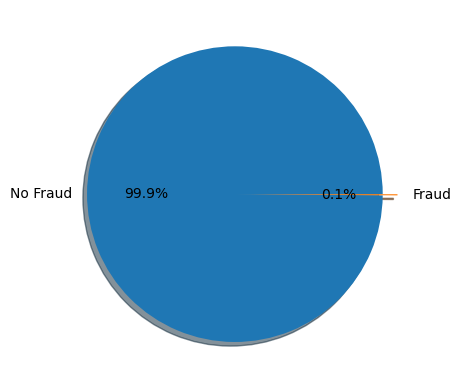

In [20]:
# value count
print(df.isFraud.value_counts())

# pie plot for the value count
plt.pie(df.isFraud.value_counts(),explode=[0.1, 0], 
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.1f%%')
plt.show()

This pie plot shows a <b>high imbalance</b> in the dataset due to tiny ratio of frauds to non-frauds.

### Type of payment

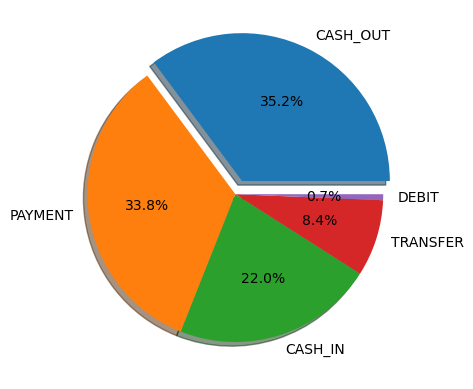

In [21]:
# pie plot for the value count of each category 
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

A vast majority of the transactions are of the type CASH_OUT having an overall proportion of a little more than one-third, closely followed by Payment mode having a share of nearly 34%. The proportion of CASH_IN transaction stood at just over one-fifth, even though, the percentage of debit and normal transfer transactions had a minimal share of less than one-tenth.

### isFlaggedFraud

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


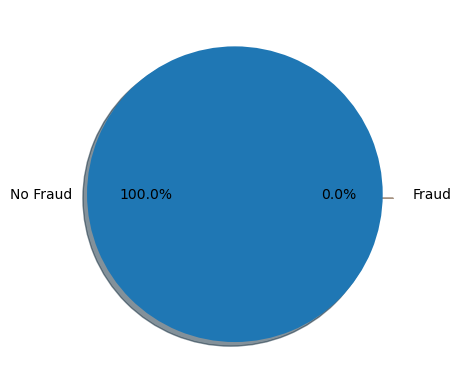

In [22]:
# value count
print(df.isFlaggedFraud.value_counts())

# pie plot for the value count
plt.pie(df.isFlaggedFraud.value_counts(),explode=[0.1, 0], 
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.1f%%')
plt.show()

### Amount

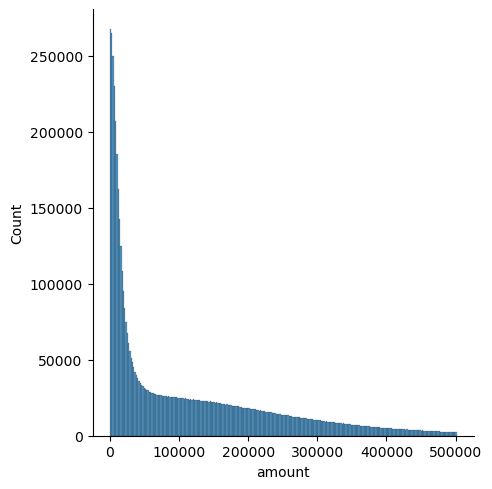

In [23]:
# distplot
sns.displot(data=df, x='amount')
plt.show()

All the balances, either old or new, of both the sender as well as the receiver have a positively right skewed distribution.

C:\Users\deepa\AppData\Local\Temp\ipykernel_23564\3927140158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_fraud_case['amount'])


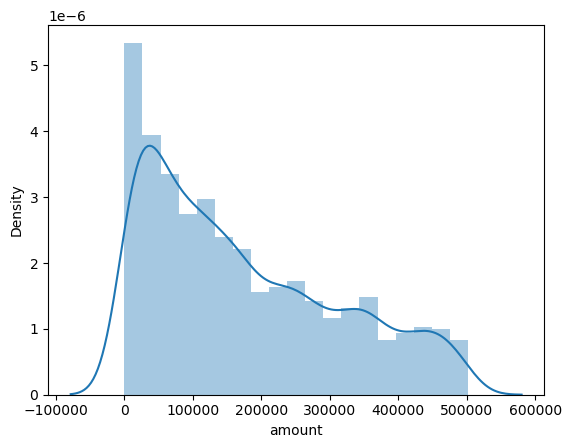

In [24]:
# distplot of amount of fraud cases 
positive_fraud_case = df[df.isFraud == 1]
sns.distplot(positive_fraud_case['amount'])
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_23564\15520195.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_fraud_case['amount'])


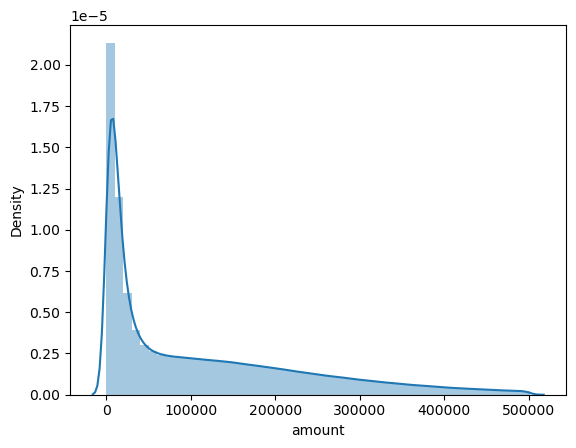

In [25]:
# distplot of amount of non-fraud cases 
non_fraud_case = df[df.isFraud == 0]
sns.distplot(non_fraud_case['amount'])
plt.show()

### Bivariate Analysis

amount and payment types

In [26]:
# max amount for each type
max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,501718.41
1,CASH_IN,501718.02
2,TRANSFER,501709.63
3,DEBIT,417825.07
4,PAYMENT,238637.98


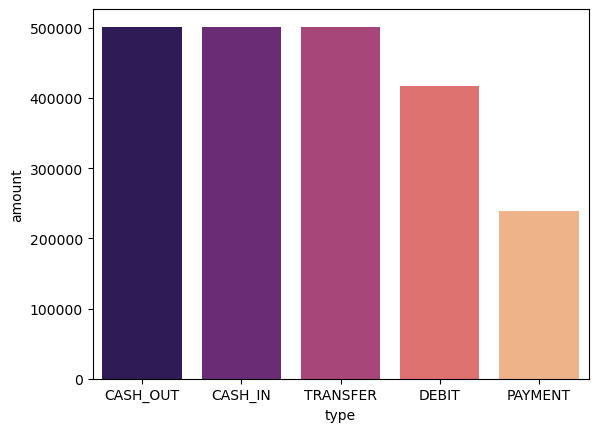

In [27]:
# barplot for max amount of each type of payment
sns.barplot(x='type', y='amount', data=max_amount_type, palette='magma')
plt.show()

oldbalanceDest and newbalanceDest

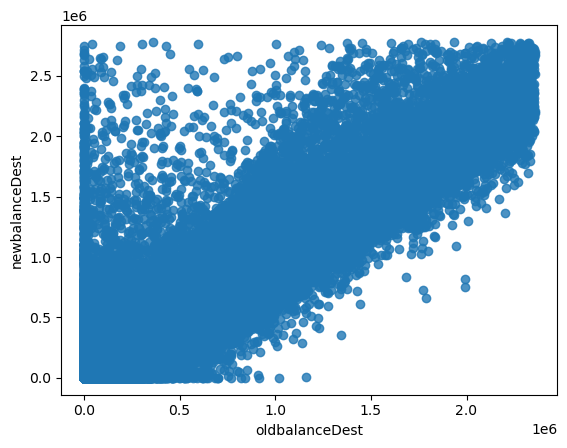

In [28]:
# regplot of relation b/w the old and new balance of the Recipient
sns.regplot(x='oldbalanceDest',y='newbalanceDest',data=df.sample(100000))
plt.show()

oldbalanceOrg and newbalanceOrig

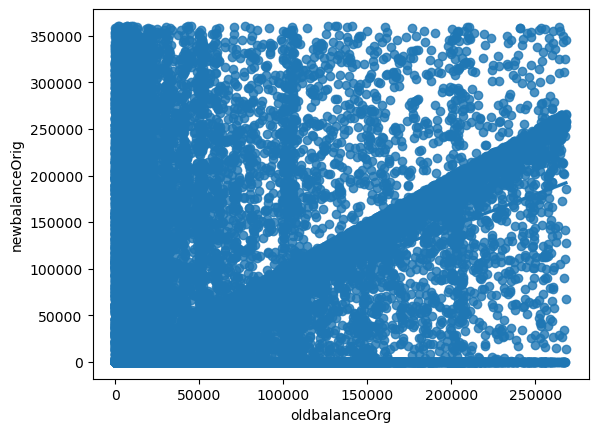

In [29]:
# regplot of relation b/w the old and new balance of the Sender
sns.regplot(x='oldbalanceOrg',y='newbalanceOrig',data=df.sample(100000))
plt.show()

# Data Pre-processing

In [30]:
# Create new columns for balance changes
df = pd.read_csv(r'C:\Users\deepa\Desktop\INFO 6105\Fraud.csv')
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop the original balance columns
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_23564\3685784014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


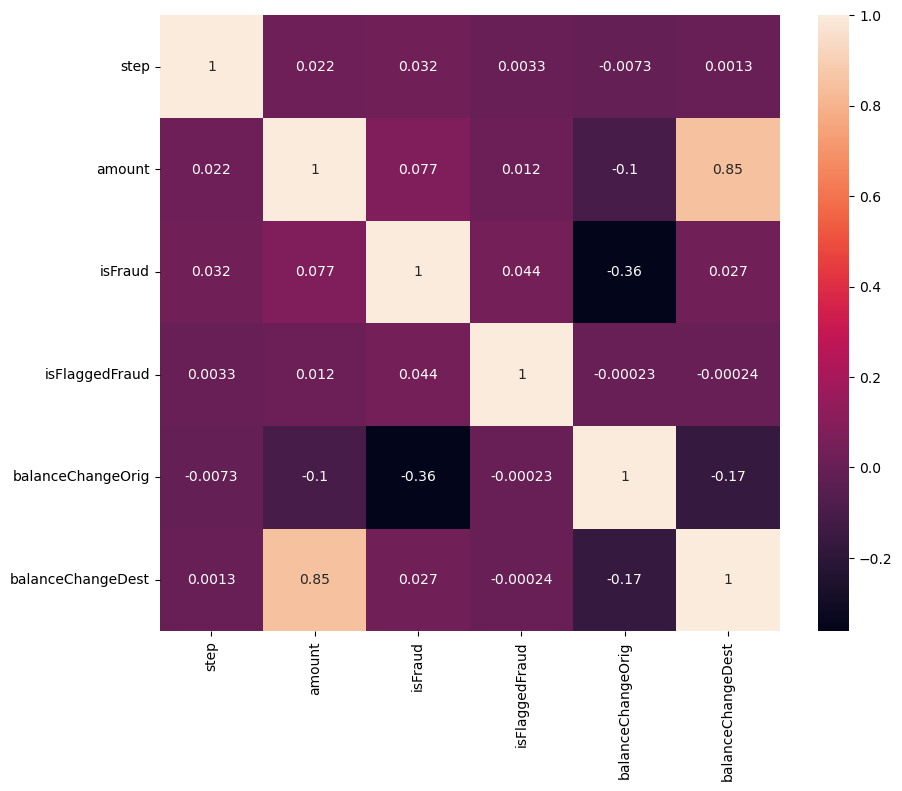

In [31]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [32]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [33]:
#Data encoding converting categorical columns to numerical
encoded_types = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, encoded_types], axis=1)

# Drop the original 'type' column
df.drop(['type'], axis=1, inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['nameOrig'] = labelencoder.fit_transform(df['nameOrig'])
df['nameDest'] = labelencoder.fit_transform(df['nameDest'])

In [35]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop(['isFraud'], axis=1)  # Features
y = df['isFraud']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [38]:
model.score(X_train_scaled,y_train)

0.9992544344939663

In [39]:
model.score(X_test_scaled,y_test)

0.9992510946748352

In [40]:
from sklearn.metrics import classification_report

# Predictions on test set for Logistic Regression
logistic_preds = model.predict(X_test_scaled)

# Classification report for Logistic Regression model
logistic_report = classification_report(y_test, logistic_preds)
print("Logistic Regression Classification Report:")
print(logistic_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.46      0.61      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.73      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



In [41]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 2)
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=2)

In [42]:
model_dt.score(X_train_scaled,y_train)

1.0

In [43]:
model_dt.score(X_test_scaled,y_test)

0.9994396962257687

In [44]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Predictions on test set
dt_preds = dt_model.predict(X_test_scaled)

# Classification report for Decision Tree model
dt_report = classification_report(y_test, dt_preds)
print("Decision Tree Classification Report:")
print(dt_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.79      0.78      0.78      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.89      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [45]:
import xgboost as xgb
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
train_score_xgb = xgb_model.score(X_train_scaled, y_train)
test_score_xgb = xgb_model.score(X_test_scaled, y_test)

In [46]:
print(train_score_xgb)

0.9996575703090865


In [47]:
print(test_score_xgb)

0.9996306552960887


In [48]:
from sklearn.metrics import classification_report

# Predictions on test set
xgb_preds = xgb_model.predict(X_test_scaled)

# Classification report for XGBoost model
xgb_report = classification_report(y_test, xgb_preds)
print("XGBoost Classification Report:")
print(xgb_report)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.73      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.86      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)
train_score_gbm = gbm_model.score(X_train_scaled, y_train)
test_score_gbm = gbm_model.score(X_test_scaled, y_test)

In [50]:
print(train_score_gbm)

0.9993424485510686


In [51]:
print(test_score_gbm)

0.9993414662513241


In [52]:
# Predictions on test set
gbm_preds = gbm_model.predict(X_test_scaled)

# Classification report for GBM model
gbm_report = classification_report(y_test, gbm_preds)
print("GBM Classification Report:")
print(gbm_report)

GBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.87      0.56      0.69      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.78      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524



In [53]:
feature_importances = model_dt.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

              Feature  Importance
5   balanceChangeOrig    0.390928
6   balanceChangeDest    0.228393
0                step    0.130257
11      type_TRANSFER    0.081029
3            nameDest    0.049986
2            nameOrig    0.049782
1              amount    0.039243
8       type_CASH_OUT    0.028865
4      isFlaggedFraud    0.001518
7        type_CASH_IN    0.000000
9          type_DEBIT    0.000000
10       type_PAYMENT    0.000000


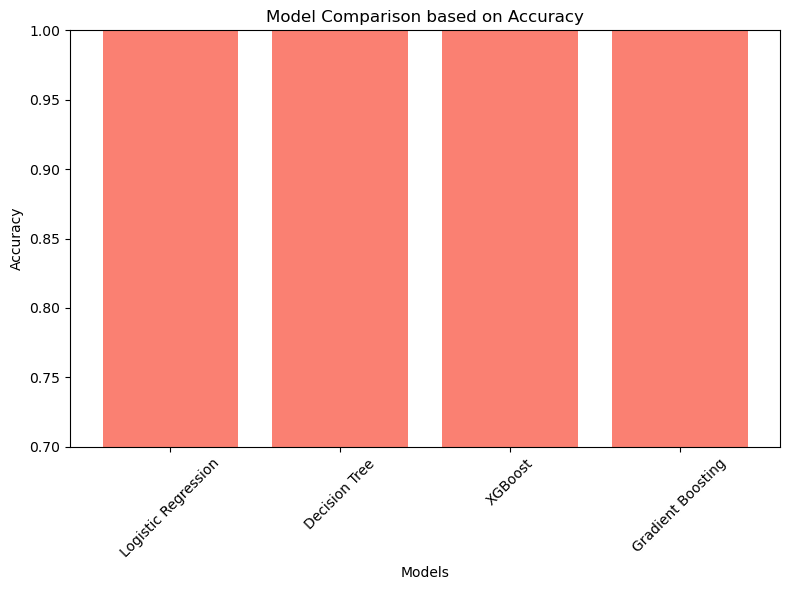

In [55]:
import matplotlib.pyplot as plt

# Defining the model names and their accuracy scores res[ectively
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Gradient Boosting']
accuracy_scores = [model.score(X_test_scaled,y_test), model_dt.score(X_test_scaled,y_test), test_score_xgb, test_score_gbm]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color='salmon')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison based on Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limits if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

def compare_models(models, model_names, X_train, y_train, X_test, y_test):
    model_scores = {}
    model_reports = {}

    for model, name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)
        
        # Calculate scores
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        model_scores[name] = {'Train Score': train_score, 'Test Score': test_score}
        
        # Generate classification report
        preds = model.predict(X_test)
        report = classification_report(y_test, preds)
        model_reports[name] = report
        
        print(f"Classification Report for {name}:")
        print(report)
        print('-' * 50)
    
    return model_scores, model_reports

# Initialize models
model_lr = LogisticRegression(max_iter=500)
model_dt = DecisionTreeClassifier(random_state=2)
model_xgb = xgb.XGBClassifier()
model_gbm = GradientBoostingClassifier()

# List of models
models = [model_lr, model_dt, model_xgb, model_gbm]
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Gradient Boosting']

# Compare models
scores, reports = compare_models(models, model_names, X_train_scaled, y_train, X_test_scaled, y_test)

# Print summary of model performances
print("Summary of Model Performances:")
for name, scores_dict in scores.items():
    print(f"{name}: Train Score - {scores_dict['Train Score']}, Test Score - {scores_dict['Test Score']}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.46      0.61      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.73      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524

--------------------------------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.78      0.78      0.78      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.89      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

--------------------------------------------------
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1